# Setting up your Work Environment

 \$conda create -n environment_name python=3.7.6 

 \$conda activate environment_name 

# Supervised vs Unsupervised Learning


- Supervised: Labeled dataset
    - label: value (regression problem)
    - label: category (classification problem)
- Unsupervised: Unlabeld dataset

**a t-Distributed Stochastic Neighbour Embedding (t-SNE) decomposition of MNIST Dataset**
https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [4]:
data = datasets.fetch_openml('mnist_784',version=1,return_X_y=True)
pixel_values, targets = data
targets= targets.astype(int)

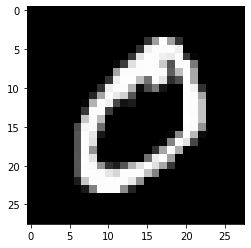

In [6]:
## visualizing the images by plotting and reshaping
single_image = pixel_values[1,:].reshape(28,28)
plt.imshow(single_image,cmap='gray')

In [8]:
tsne = manifold.TSNE(n_components = 2, random_state = 42)
transformed_data = tsne.fit_transform(pixel_values[:3000,:])

This step creates the t-SNE transformation of the data. We use only two components  as we can visualize them well in a two-dimensional setting. The transformed_data,  in this case, is an array of shape 3000x2 (3000 rows and 2 columns). A data like  this can be converted to a pandas dataframe by calling pd.DataFrame on the array. 

In [9]:
tsne_df = pd.DataFrame(
        np.column_stack((transformed_data,targets[:3000])),
        columns=["x","y","targets"]
)

tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)

In [10]:
tsne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        3000 non-null   float64
 1   y        3000 non-null   float64
 2   targets  3000 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 58.7 KB


In [11]:
tsne_df.head(5)

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9


C:\Users\apurv\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


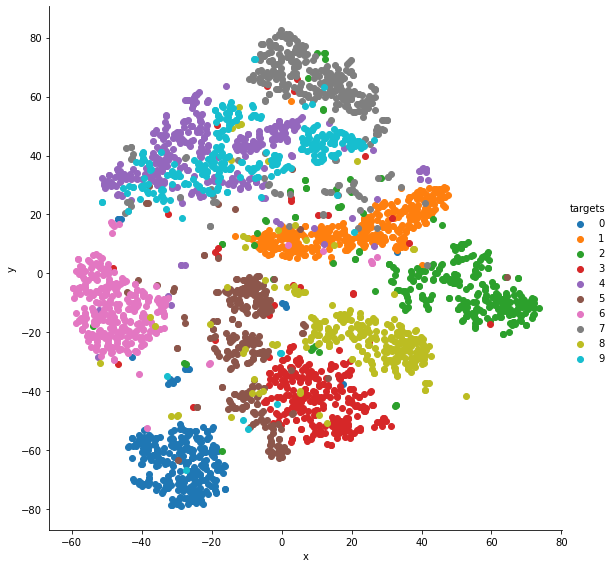

In [12]:
## Plotting the df

grid = sns.FacetGrid(tsne_df, hue = "targets",size =8)
grid.map(plt.scatter, "x","y").add_legend()

In [13]:
## Can use kmeans as well
#<ToDO>

# Cross-Validation

using red-wine dataset (no link in the book)

Kaggle:https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [23]:
## Loading data set
# unzipping dataset
import zipfile
with zipfile.ZipFile("datasets/archive.zip", 'r') as zip_ref:
    zip_ref.extractall("datasets/")

In [25]:
data_path = "datasets/winequality-red.csv"
df = pd.read_csv(data_path)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [27]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
cols = df.columns
for i in range(0,len(cols)):
    print(df[cols[i]].value_counts())

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.4     1
14.0     1
5.5      1
4.6      1
4.7      1
Name: fixed acidity, Length: 96, dtype: int64
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.090     1
1.035     1
1.580     1
0.950     1
0.805     1
Name: volatile acidity, Length: 143, dtype: int64
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.75      1
0.78      1
1.00      1
0.62      1
0.72      1
Name: citric acid, Length: 80, dtype: int64
2.00    156
2.20    131
1.80    129
2.10    128
1.90    117
       ... 
5.70      1
2.85      1
7.30      1
8.90      1
2.65      1
Name: residual sugar, Length: 91, dtype: int64
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.137     1
0.267     1
0.043     1
0.186     1
0.125     1
Name: chlorides, Length: 153, dtype: int64
6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11.0     59
1

In [33]:
quality_mapping = {  3: 0,  4: 1,  5: 2,  6: 3,  7: 4,  8: 5  } 
df.loc[:, "quality"] = df.quality.map(quality_mapping)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [35]:
## Creating train test set by shuffling the values and selecting top 1000 rows for training and last 599 rows as test data
df = df.sample(frac =1).reset_index(drop=True)
df_train = df.head(1000)
df_test = df.tail(599)

In [39]:
## Applying decision tree on the dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf  = DecisionTreeClassifier(max_depth = 3, random_state=42)

train_cols = cols[:-1]
test_cols = cols[-1]

#Model fitting
clf.fit(df_train[train_cols],df_train[test_cols])

DecisionTreeClassifier(max_depth=3, random_state=42)

In [41]:
## Predicting the results on train set
train_pred = clf.predict(df_train[train_cols])
## Predicting the results on train set
test_pred = clf.predict(df_test[train_cols])

In [43]:
## Calculating accuracy on train and test both
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(df_train[test_cols],train_pred)
test_acc = accuracy_score(df_test[test_cols],test_pred)

print(train_acc)
print(test_acc)

0.599
0.5559265442404007


In [45]:
## Checking effect of different depths in tree (looping)
train_accuracy = []
test_accuracy = []

for depth in range(1,25):
    clf  = DecisionTreeClassifier(max_depth = depth, random_state=42)
    clf.fit(df_train[train_cols],df_train[test_cols])
    train_pred = clf.predict(df_train[train_cols])
    test_pred = clf.predict(df_test[train_cols])
    train_accuracy.append(accuracy_score(df_train[test_cols],train_pred))
    test_accuracy.append(accuracy_score(df_test[test_cols],test_pred))

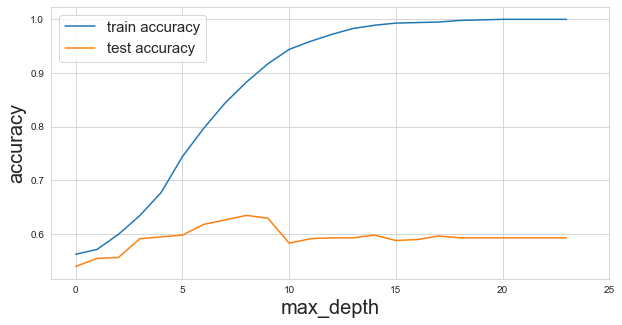

In [46]:
plt.figure(figsize=(10, 5))  
sns.set_style("whitegrid")  
plt.plot(train_accuracy, label="train accuracy")  
plt.plot(test_accuracy, label="test accuracy")  
plt.legend(loc="upper left", prop={'size': 15})  
plt.xticks(range(0, 26, 5))  
plt.xlabel("max_depth", size=20)  
plt.ylabel("accuracy", size=20)  
plt.show() 


overfitting after max_depth = 14/15

-----
Occam’s razor in simple words states that one should not try to complicate things  that can be solved in a much simpler manner. In other words, the simplest solutions  are the most generalizable solutions. In general, whenever your model does not  obey Occam’s razor, it is probably overfitting. 

#### Cross Validation

- Types of Cross Validations
    - k-fold cross-validation
    - stratified k-fold cross validation
        - you can use a simple rule like Sturge’s Rule to calculate the appropriate  number of bins.  
        - Sturge’s rule:  Number of Bins = 1 + log2(N) 
    - hold-out based cross validation
    - leave-one-out cross-validation
    - group k-fold cross validation
    
        

Text(0, 0.5, 'count')

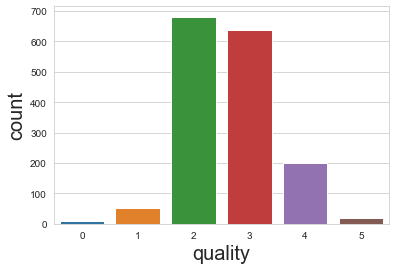

In [49]:
b = sns.countplot(x='quality', data=df)  
b.set_xlabel("quality", fontsize=20)  
b.set_ylabel("count", fontsize=20) 

Cross-validation is the first and most essential step when it comes to building  machine learning models. If you want to do feature engineering, split your data first.  If you're going to build models, split your data first. If you have a good crossvalidation scheme in which validation data is representative of training and realworld data, you will be able to build a good machine learning model which is highly  generalizable. 


##### Excercise

we would like to build a model  to detect skin cancer from skin images of patients. build a binary  classifier which takes an input image and predicts the probability for it being benign  or malignant. 
######  TO DO
    
## Evaluation Metrics

- Common Evaluation metrics
    - Classification problems:
        - Accuracy
        - Precision (P)
        - Recall (R)
        - F1 Score ( harmonic mean of precision and recall)
        - AUC (area under ROC curve)
        - Log loss
        - Precision at K
        - Avg precision at K
        - Mean avg precision at K
    - Regression problems:
        - Mean abs error
        - mean sqrd error
        - root mean sqrd error
        - root mean sqrd log error
        - mean percent error
        - mean abs percent error
        - R2
        - adjusted r2


### Problem Statement

https://www.kaggle.com/c/siim-acr-pneumothorax-segmentation 


When we have an equal number of positive and negative samples in a binary  classification metric, we generally use accuracy, precision, recall and f1. 


In [51]:
#accuracy function method 1
def accuracy(y_true,y_pred):
    correct_counter = 0
    for yt,yp in zip(y_true,y_pred):
        if yt==yp:
            correct_counter+=1
    return correct_counter/len(y_true)

## accuracy function method 2
from sklearn.metrics import accuracy_score

l1 = [1,0,1,0]
l2 = [1,0,0,1]
accuracy_score(l1,l2)

0.5

In [52]:
## Calculating TN, TP, FN, FP usign functions

def true_positive (y_true,y_pred):
    tp = 0
    for yt,yp in zip(y_true,y_pred):
        if yt == 1 and yp == 1:
            tp+=1
    return tp

def true_negative (y_true,y_pred):
    tn = 0
    for yt,yp in zip(y_true,y_pred):
        if yt == 0 and yp == 0:
            tn+=1
    return tn

def false_positive (y_true,y_pred):
    fp = 0
    for yt,yp in zip(y_true,y_pred):
        if yt == 0 and yp == 1:
            fp+=1
    return fp

def false_negative (y_true,y_pred):
    fn = 0
    for yt,yp in zip(y_true,y_pred):
        if yt == 1 and yp == 0:
            fn+=1
    return fn

In [53]:
## Chekcing functions 
print(true_negative(l1,l2))
print(true_positive(l1,l2))
print(false_negative(l1,l2))
print(false_positive(l1,l2))

1
1
1
1


In [54]:
## Accuracy Score = (TP + TN)/ (TP + TN + FP + FN) 
def accuracy(y_true,y_pred):
    tn = true_negative(y_true,y_pred)
    tp = true_positive(y_true,y_pred)
    fn = false_negative(y_true,y_pred)
    fp = false_positive(y_true,y_pred)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    return accuracy

In [56]:
accuracy(l1,l2)

0.5

In [59]:
## Precision = TP/ (TP + FP) 

def precision(y_true,y_pred):
    tp = true_positive(y_true,y_pred)
    fp = false_positive (y_true,y_pred)
    precision = tp /(tp+fp)
    return precision

## Recall = TP/ (TP + FN) 

def recall(y_true,y_pred):
    tp = true_positive(y_true,y_pred)
    fn = false_negative (y_true,y_pred)
    recall = tp / (tp+fn)
    return recall

In [58]:
precision(l1,l2)

0.5

In [60]:
recall(l1,l2)

0.5

In [61]:
## F1 = 2PR/ (P + R) 
## F1 = 2TP/ (2TP + FP + FN) 

def f1_score(y_true,y_pred):
    tp = true_positive(y_true,y_pred)
    fp = false_positive(y_true,y_pred)
    fn = false_negative(y_true,y_pred)
    f1_score = (2* tp) /(2*tp + fp + fn)
    return f1_score
    

In [62]:
f1_score(l1,l2)

0.5

AUC values range from 0 to 1.  
    - AUC = 1 implies you have a perfect model. Most of the time, it means that  you made some mistake with validation and should revisit data processing  and validation pipeline of yours. If you didn’t make any mistakes, then  congratulations, you have the best model one can have for the dataset you  built it on.  
    - AUC = 0 implies that your model is very bad (or very good!). Try inverting  the probabilities for the predictions, for example, if your probability for the  positive class is p, try substituting it with 1-p. This kind of AUC may also  mean that there is some problem with your validation or data processing.  
    - AUC = 0.5 implies that your predictions are random. So, for any binary  classification problem, if I predict all targets as 0.5, I will get an AUC of  0.5. 


In [64]:
## Log Loss = - 1.0 * (target * log(prediction) + (1 - target) * log(1 - prediction)) 

import numpy as np  

def log_loss(y_true, y_proba): 
    epsilon = 1e-15 
    loss = []  
    for yt, yp in zip(y_true, y_proba):   
        yp = np.clip(yp, epsilon, 1 - epsilon)  
        temp_loss = - 1.0 * (  yt * np.log(yp)  + (1 - yt) * np.log(1 - yp)  )  
        loss.append(temp_loss)  
    return np.mean(loss)

In [65]:
log_loss(l1,l2)

17.26958809681289

In [66]:
from sklearn.metrics import log_loss

print(log_loss(l1,l2))

17.26958809681289


In [1]:
## Acurracies for multi label classifications

##PK precision is defined as the number  of hits in the predicted list considering only top-k predictions, divided by k. 

def pk(y_true,y_pred,k):
    if k==0:
        return 0
    y_pred = y_pred[:k]
    pred_set = set(y_pred)
    true_set = set(y_true)
    common_values = pred_set.intersection(true_set)
    return len(common_values)/len(y_pred[:k])

##APK avg of PK for k= 1,2,3..k

def apk(y_true,y_pred,k):
    pk_vals = []
    for i in range(0,k):
        pk_vals.append(pk(y_true,y_pred,i+1))
    if(len(pk_vals)==0):
        return 0
    return sum(pk_vals)/len(pk_vals)
        
##MAPK = Averages of APKs

def mapk(y_true,y_pred,k):
    apk_vals = []
    for i in range(len(y_true)):
        apk_vals.append(apk(y_true[i], y_pred[i], k=k))
    return sum(apk_vals)/len(apk_vals)

##PK, APK, MAPK all range from 0 to 1, 1 being best

In [2]:
## Error = True val - predicted val
## Abs error = abs (tv - pv)

import numpy as np  

def mean_absolute_error(y_true, y_pred):  
    error = 0  
    for yt, yp in zip(y_true, y_pred):  
        error += np.abs(yt - yp)  
        return error/ len(y_true)  
    
## Sqrd error = (tv - pv)^2

def mean_sqrd_error(y_true, y_pred):  
    error = 0  
    for yt, yp in zip(y_true, y_pred):  
        error += (yt - yp)**2  
    return error/ len(y_true) 

## Mean sqrd error = sqrt (mse)    

def rmse(y_true,y_pred):
    return np.sqrt(mean_sqrd_error(y_true,y_pred))

## sqrd log error

def mean_sqrd_log_error(y_true, y_pred):  
    error = 0  
    for yt, yp in zip(y_true, y_pred):  
        error += (np.log(1+yt) - np.log(1+yp))**2  
    return error/ len(y_true) 

## rmsle = sqrt(msle)

def rmsle(y_true,y_pred):
    return np.sqrt(mean_sqrd_log_error(y_true,y_pred))

## percentage error = (tv/pv - 1)*100

def percent_error(y_true, y_pred):  
    error = 0  
    for yt, yp in zip(y_true, y_pred):  
        error += (yt - yp)/yt  
    return error/ len(y_true) 

## mean abs percent error 

def mean_sqrd_error(y_true, y_pred):  
    error = 0  
    for yt, yp in zip(y_true, y_pred):  
        error += np.abs(yt - yp)/yt  
    return error/ len(y_true) 




In [6]:
## Other accuracies in regression 

## R2

import numpy as np  

def r2(y_true, y_pred): 
    mean_true_value = np.mean(y_true)  
    numerator = 0 
    denominator = 0 
    for yt, yp in zip(y_true, y_pred):   
        numerator += (yt - yp) ** 2  
        denominator += (yt - mean_true_value) ** 2  
        ratio = numerator/ denominator 
    return (1 - ratio)  


**Advance metrics**

- quadritic weighted kappa / cohen's kappa (QWK):
    - agreement between two values, approach 1 in high agreement
    - QWK > 0.85  good model
- Mathew correlation cofficient (MCC):
    - MCC = (TP\*TN - FP\*FN)/ [(TP+FP)\*(TN+FN)\*(FP+TN)\*(FN+TP)]^(0.5)

In [ ]:
## MCC 

def mcc (y_pred, y_true):
    tn = true_negative(y_true,y_pred)
    tp = true_positive(y_true,y_pred)
    fn = false_negative(y_true,y_pred)
    fp = false_positive(y_true,y_pred)
    return (tp*tn - fp*fn)/ (((tp+fp)*(tn+fn)*(fp+tn)*(fn+tp))**(0.5))